# KNN

In [1]:
#import necessary librabries
import pandas as pd
from pandas import Series,DataFrame
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [2]:
#load the dataset
data = pd.read_csv('milk.csv')

In [3]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [5]:
df = data

# Separate features (X) and target variable (y)
X = df.drop('Grade', axis=1)
y = df['Grade']

# Convert categorical labels to numeric using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=90)

# Fit the model to the training data
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test_scaled)

# Convert predictions back to original labels
y_pred_original = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Example query for prediction
example_query = np.array([[6.0, 38, 1, 0, 1, 0, 254]])  # Replace with your own values
example_query_scaled = scaler.transform(example_query)
example_prediction = knn_classifier.predict(example_query_scaled)
example_prediction_original = label_encoder.inverse_transform(example_prediction)
print("Example Query Prediction:", example_prediction_original)


Accuracy: 0.8066037735849056
Confusion Matrix:
[[41  2  5]
 [16 50 12]
 [ 6  0 80]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.85      0.74        48
           1       0.96      0.64      0.77        78
           2       0.82      0.93      0.87        86

    accuracy                           0.81       212
   macro avg       0.81      0.81      0.79       212
weighted avg       0.84      0.81      0.80       212

Example Query Prediction: ['high']


c:\Users\ARJUN KAPADIA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


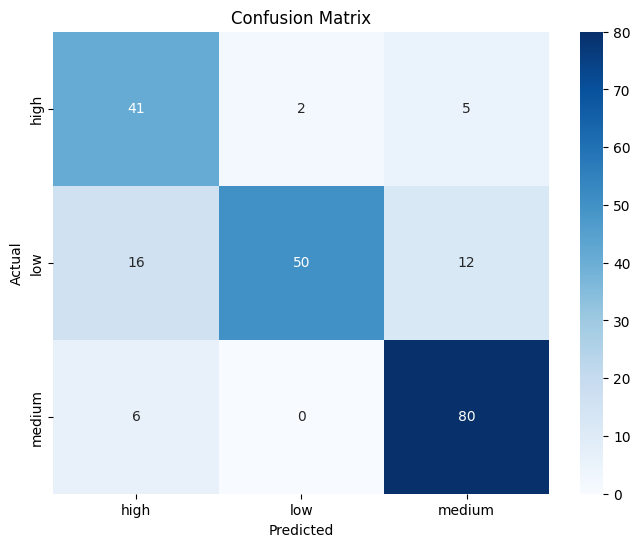

In [6]:

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [7]:

# Example grid search for 'n_neighbors'
param_grid = {'n_neighbors': [97, 50, 55, 90]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
 
# Get the best parameter
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f"Best k value: {best_n_neighbors}")

Best k value: 90


In [8]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [9]:
#allocating 33% of the dataset for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  random_state=1)

In [10]:
# random value of n_neighbors, we will find a better value of k later.
knn = KNeighborsClassifier(n_neighbors=1)

In [11]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
pred=knn.predict(X_test)

In [13]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        high       0.97      0.99      0.98        78
         low       1.00      1.00      1.00       155
      medium       0.99      0.98      0.99       117

    accuracy                           0.99       350
   macro avg       0.99      0.99      0.99       350
weighted avg       0.99      0.99      0.99       350



In [14]:
#calculating the error rate
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
    

In [15]:
error_rate

[0.008571428571428572,
 0.008571428571428572,
 0.008571428571428572,
 0.011428571428571429,
 0.011428571428571429,
 0.011428571428571429,
 0.025714285714285714,
 0.025714285714285714,
 0.03428571428571429,
 0.03428571428571429,
 0.03428571428571429,
 0.03428571428571429,
 0.03428571428571429,
 0.037142857142857144,
 0.037142857142857144,
 0.05714285714285714,
 0.04285714285714286,
 0.04285714285714286,
 0.04285714285714286,
 0.04285714285714286,
 0.05142857142857143,
 0.05142857142857143,
 0.05142857142857143,
 0.08571428571428572,
 0.08571428571428572,
 0.08857142857142856,
 0.08857142857142856,
 0.09428571428571429,
 0.10285714285714286,
 0.13142857142857142,
 0.13714285714285715,
 0.13428571428571429,
 0.13428571428571429,
 0.15142857142857144,
 0.11142857142857143,
 0.12285714285714286,
 0.1,
 0.14,
 0.15142857142857144]

In [16]:

# Assume 'data' is your DataFrame
df = data

# Separate features (X) and target variable (y)
X = df.drop('Grade', axis=1)
y = df['Grade']

# Convert categorical labels to numeric using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [1,2,3,4,5],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create the best KNN classifier with the optimal hyperparameters
best_knn_classifier = KNeighborsClassifier(**best_params)

# Fit the model to the training data
best_knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = best_knn_classifier.predict(X_test_scaled)

# Convert predictions back to original labels
y_pred_original = label_encoder.inverse_transform(y_pred)

# Evaluate the model with optimal hyperparameters
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy with Best Hyperparameters: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Example query for prediction
example_query = np.array([[20, 30, 50, 80, 90, 10, 100]])  # Replace with your own values
example_query_scaled = scaler.transform(example_query)
example_prediction = best_knn_classifier.predict(example_query_scaled)
example_prediction_original = label_encoder.inverse_transform(example_prediction)
print("Example Query Prediction:", example_prediction_original)


Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy with Best Hyperparameters: 0.9952830188679245
Confusion Matrix:
[[48  0  0]
 [ 1 77  0]
 [ 0  0 86]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.99      0.99        78
           2       1.00      1.00      1.00        86

    accuracy                           1.00       212
   macro avg       0.99      1.00      0.99       212
weighted avg       1.00      1.00      1.00       212

Example Query Prediction: ['high']


c:\Users\ARJUN KAPADIA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
